In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [193]:
data = pd.read_csv(r"C:\Users\HAI\Downloads\EDA2\EDA2\adult_with_headers.csv")
df = pd.DataFrame(data)
df.head(15)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [194]:
#Check for the null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [195]:
#To print the only numarical columns
df.select_dtypes(include = 'number')

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


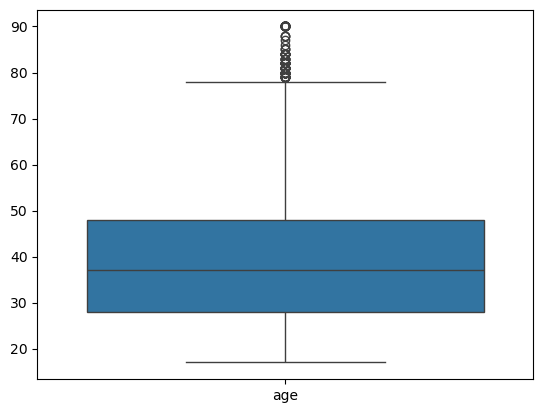

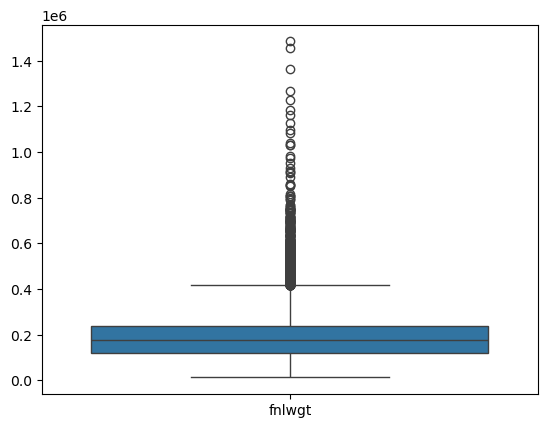

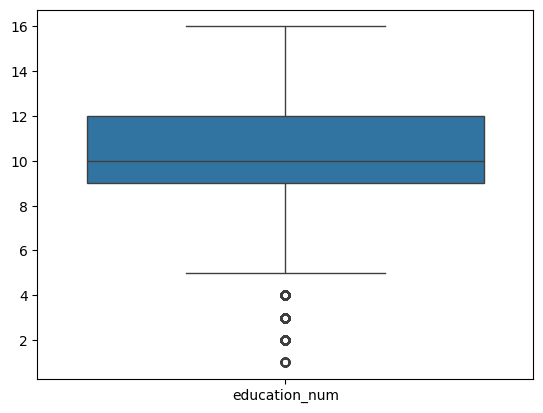

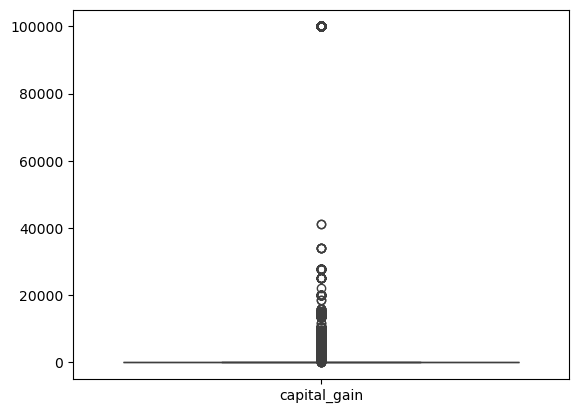

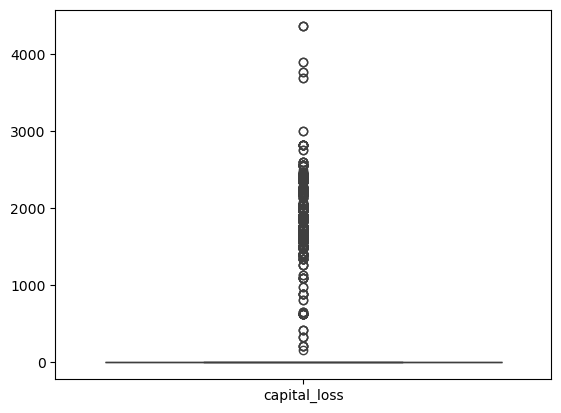

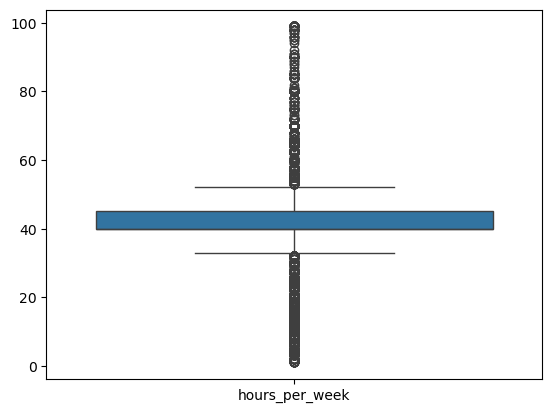

In [196]:
#check for the numarical columns outliers have or not
for col in df.select_dtypes(include = 'number'):
    sns.boxplot(df[[col]])
    plt.show()

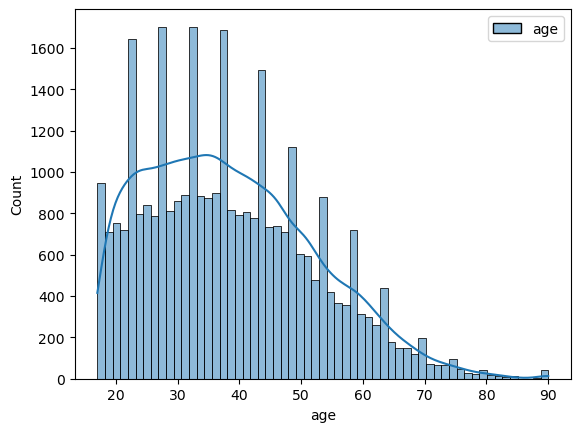

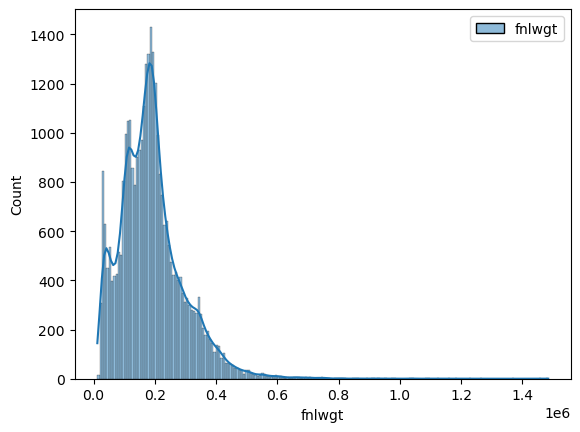

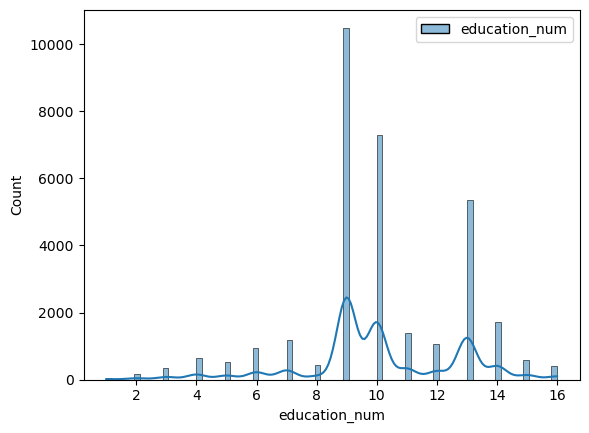

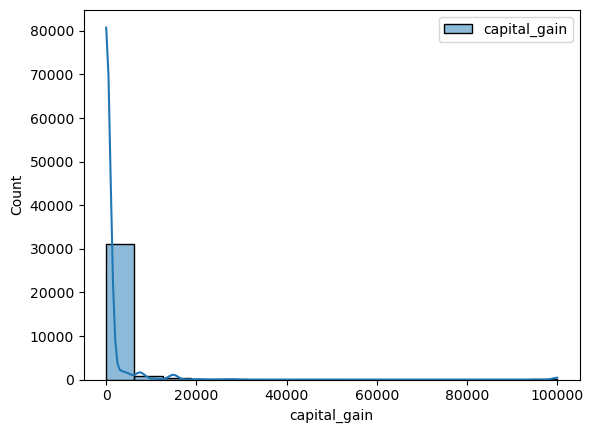

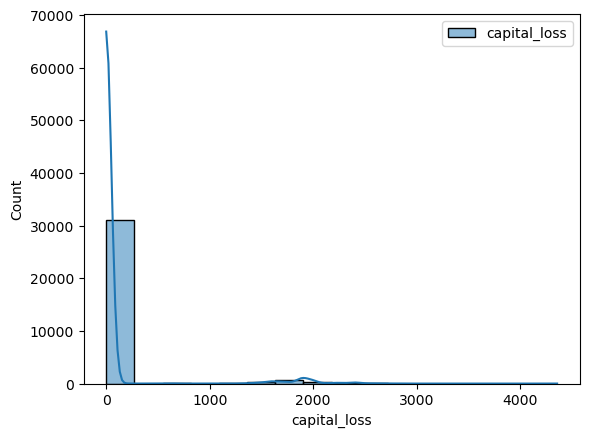

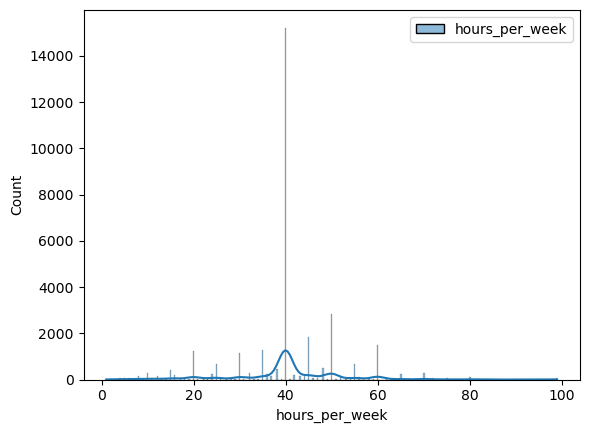

In [197]:
#The Numarical column as the check for the Distribution 
for col in df.select_dtypes(include = 'number'):
    sns.histplot(df[[col]],kde = True)
    plt.xlabel(col)
    plt.show()

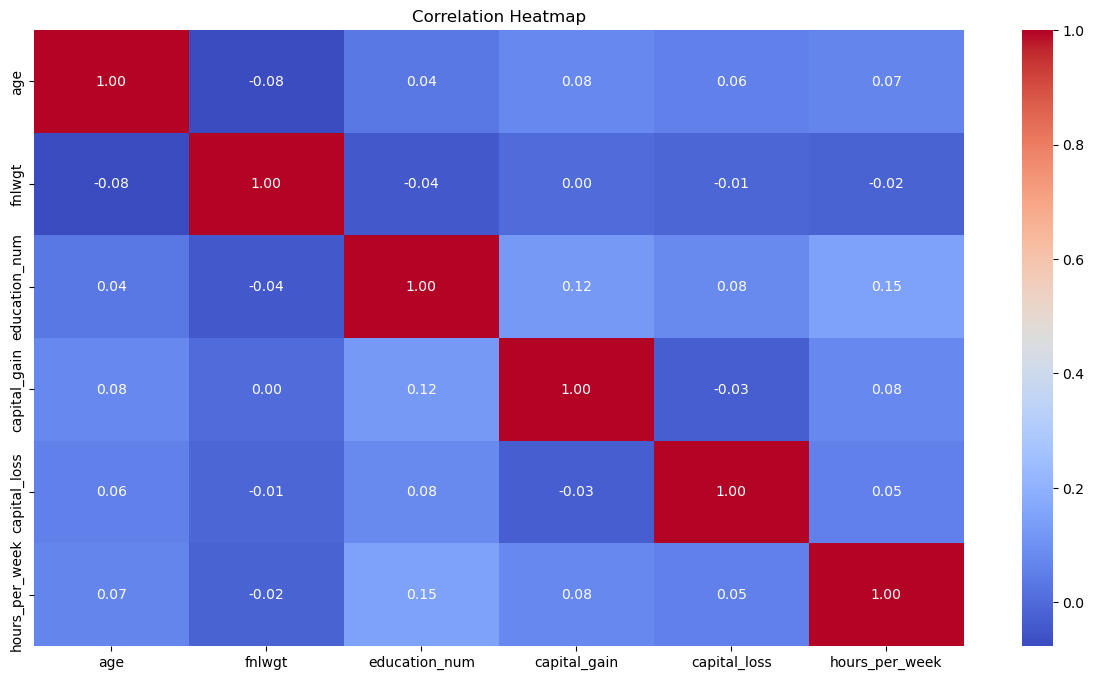

In [200]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [161]:
numarical_columns = df.select_dtypes(include = 'number')

In [162]:
#Skewness of the each numarical column
print(numarical_columns.skew())

age                0.558743
fnlwgt             1.446980
education_num     -0.311676
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
dtype: float64


In [163]:
from sklearn.ensemble import IsolationForest

In [164]:
x = df.select_dtypes(include = 'number')
print(x.columns)

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [165]:
Is = IsolationForest(random_state = 42,contamination = 0.05,n_jobs = 1)

In [166]:
print(Is.get_params())

{'bootstrap': False, 'contamination': 0.05, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': 1, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [167]:
df['New_column'] = Is.fit_predict(x)

In [168]:
print(df['New_column'].unique())

[ 1 -1]


In [169]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,New_column
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


In [170]:
from sklearn.preprocessing import MinMaxScaler

In [171]:
mms = MinMaxScaler()

In [172]:
numarical = df.select_dtypes(include = 'number')
print(numarical.columns)

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'New_column'],
      dtype='object')


In [173]:
df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss','hours_per_week']] = mms.fit_transform(df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss','hours_per_week']]).astype(int)

In [174]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,New_column
0,0,State-gov,0,Bachelors,0,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,0,United-States,<=50K,1
1,0,Self-emp-not-inc,0,Bachelors,0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K,1
2,0,Private,0,HS-grad,0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,0,United-States,<=50K,1
3,0,Private,0,11th,0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,0,United-States,<=50K,1
4,0,Private,0,Bachelors,0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,0,Cuba,<=50K,1
5,0,Private,0,Masters,0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,0,United-States,<=50K,1
6,0,Private,0,9th,0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,0,Jamaica,<=50K,1
7,0,Self-emp-not-inc,0,HS-grad,0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,>50K,1
8,0,Private,0,Masters,0,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,0,United-States,>50K,1
9,0,Private,0,Bachelors,0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,>50K,1


In [175]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [176]:
#To Remove the White Space
df['sex'] = df['sex'].str.strip()

In [177]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [178]:
df['sex'] = df['sex'].map({'Male':1,'Female':0})

In [179]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,New_column
0,0,State-gov,0,Bachelors,0,Never-married,Adm-clerical,Not-in-family,White,1,0,0,0,United-States,<=50K,1
1,0,Self-emp-not-inc,0,Bachelors,0,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,0,United-States,<=50K,1
2,0,Private,0,HS-grad,0,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,0,United-States,<=50K,1
3,0,Private,0,11th,0,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,0,United-States,<=50K,1
4,0,Private,0,Bachelors,0,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,0,Cuba,<=50K,1
5,0,Private,0,Masters,0,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,0,United-States,<=50K,1
6,0,Private,0,9th,0,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,0,Jamaica,<=50K,1
7,0,Self-emp-not-inc,0,HS-grad,0,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,0,United-States,>50K,1
8,0,Private,0,Masters,0,Never-married,Prof-specialty,Not-in-family,White,0,0,0,0,United-States,>50K,1
9,0,Private,0,Bachelors,0,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,0,United-States,>50K,1


In [180]:
catagorical = df.select_dtypes(include = 'object')
for col in catagorical:
    print(df[col],':',df[col].unique())

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
               ...        
32556              Private
32557              Private
32558              Private
32559              Private
32560         Self-emp-inc
Name: workclass, Length: 32561, dtype: object : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
0          Bachelors
1          Bachelors
2            HS-grad
3               11th
4          Bachelors
            ...     
32556     Assoc-acdm
32557        HS-grad
32558        HS-grad
32559        HS-grad
32560        HS-grad
Name: education, Length: 32561, dtype: object : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
0              Never-married
1         Married-civ-spouse
2   

In [181]:
from sklearn.preprocessing import OneHotEncoder

In [182]:
ohe = OneHotEncoder()

In [183]:
catagorical = df.select_dtypes(include = 'object')
encoder = ohe.fit_transform(df[['workclass', 'education', 'marital_status', 'occupation','relationship', 'race', 'native_country', 'income']]).astype(int).toarray()

In [184]:
df_dataframe = pd.DataFrame(encoder,columns = ohe.get_feature_names_out(['workclass', 'education', 'marital_status', 'occupation','relationship', 'race', 'native_country', 'income']))

In [185]:
df = pd.concat([df,df_dataframe],axis = 1)

In [186]:
df.drop(['workclass', 'education', 'marital_status', 'occupation','relationship', 'race', 'native_country', 'income'],inplace = True,axis = 1)

In [187]:
df.head(10)

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,New_column,workclass_ ?,workclass_ Federal-gov,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
9,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [188]:
for col in df.columns:
    print(df[col],':',df[col].unique())

#all Columns are converted into binary formate or not to check

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: age, Length: 32561, dtype: int64 : [0 1]
0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: fnlwgt, Length: 32561, dtype: int64 : [0 1]
0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: education_num, Length: 32561, dtype: int64 : [0 1]
0        1
1        1
2        1
3        1
4        0
        ..
32556    0
32557    1
32558    0
32559    1
32560    0
Name: sex, Length: 32561, dtype: int64 : [1 0]
0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: capital_gain, Length: 32561, dtype: int64 : [0 1]
0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: capital_los

In [ ]:
--->How can outliers affect model performance?
A)Outliers are data points that are very different from the majority.
They can distort the learning process of machine learning models.
Biased models
Reduced accuracy
Overfitting